In [1]:
import pandas as pd
df=pd.read_csv("amazon_electronics.csv",usecols=['product_title','product_category','star_rating','helpful_votes','review_body'])
df.head(2)
df1=df

C:\Users\HP\AppData\Local\Temp\ipykernel_18584\60317128.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("amazon_electronics.csv",usecols=['product_title','product_category','star_rating','helpful_votes','review_body'])


In [2]:
df.shape

(95002, 5)

In [3]:
df.isnull().sum()

product_title       0
product_category    0
star_rating         0
helpful_votes       0
review_body         0
dtype: int64

In [4]:
df.duplicated().sum()

42

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
from bs4 import BeautifulSoup 
import re 
import nltk
from nltk.corpus import stopwords 
try:
    nltk.download("Stopwords",quiet=True)
except Exception as e:
    print(e)
else:
    st=stopwords.words('english')
print("Libraries and stop words loaded successfully.....")

def clean_data(data):
    ans=BeautifulSoup(data,'html.parser').get_text()
    ans=ans.lower()
    ans=re.sub("[^a-z]"," ",ans)
    l=[]
    for i in ans.split():
        if i not in st:
            l.append(i)
    return " ".join(l)
    
df['new_review']=df['review_body'].apply(clean_data)
print(df.head(3))

[nltk_data] Error loading Stopwords: Package 'Stopwords' not found in
[nltk_data]     index
C:\Users\HP\AppData\Local\Temp\ipykernel_18584\529708266.py:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  ans=BeautifulSoup(data,'html.parser').get_text()


Libraries and stop words loaded successfully.....
                                       product_title product_category  \
0  Powertron 72200 3.5 VOLT BATTERY FOR WELCH ALL...      Electronics   
1        AmazonBasics Ultra Thin Indoor HDTV Antenna      Electronics   
2                  Clip Plus 4 GB MP3 Player (Black)      Electronics   

  star_rating helpful_votes  \
0           1             1   
1           4             0   
2           5             0   

                                         review_body  \
0  While the battery arrived in a timely manner, ...   
1  Does a good job of pulling in 30+ channels.  S...   
2  The Sansa Clip + is just awesome.  It has a re...   

                                          new_review  
0  battery arrived timely manner would hold charg...  
1  good job pulling channels strangely found get ...  
2  sansa clip awesome really long charge think ch...  


# TextBlob

In [7]:
from textblob import TextBlob
pr=[]
for i in df['new_review']:
    x=TextBlob(i)
    p=x.sentiment.polarity
    pr.append(p)



df['Polarity']=pr

        

In [8]:
df.head(10)

,product_title,product_category,star_rating,helpful_votes,review_body,new_review,Polarity
0,Powertron 72200 3.5 VOLT BATTERY FOR WELCH ALL...,Electronics,1,1,"While the battery arrived in a timely manner, ...",battery arrived timely manner would hold charg...,-0.275000
1,AmazonBasics Ultra Thin Indoor HDTV Antenna,Electronics,4,0,Does a good job of pulling in 30+ channels. S...,good job pulling channels strangely found get ...,0.391667
2,Clip Plus 4 GB MP3 Player (Black),Electronics,5,0,The Sansa Clip + is just awesome. It has a re...,sansa clip awesome really long charge think ch...,0.416667
3,Bose UFS-20 Universal Floor Stands (pair),Electronics,5,0,Quality stands.,quality stands,0.000000
4,Sony MDRZX100 Headphones,Electronics,3,0,"These were very good headphones for a while, b...",good headphones months sound one side went com...,0.208939
5,BUSlink XL-5100 / F93087600 UHP TV LAMP REPLAC...,Electronics,1,0,I purchased this lamp 3 weeks ago I have used ...,purchased lamp weeks ago used maybe one half w...,-0.233333
6,4 pairs - Childrens Passive 3D Glasses for Kid...,Electronics,5,0,Fits great and works just like the ones bought...,fits great works like ones bought tv,0.800000
7,Yurbuds Inspire Duro Headphones,Electronics,3,0,"Would not buy again. Ear \\""adaptors\\"" fall o...",would buy ear adaptors fall pull easily render...,0.190972
8,Emotiva UPA-200 2-Channel Amplifier,Electronics,5,0,awsome amp for my front two floor speakers in ...,awsome amp front two floor speakers channel set,0.000000
9,Memorex Sport Boombox,Electronics,5,4,The boom box works as advertised. Produces de...,boom box works advertised produces decent soun...,0.283333


In [9]:
# Convert to numeric safely                                     #convert to int directly using type casting or loop is not possible and dtype is object
df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')

# Classify sentiment
df['Sentiment'] = df['star_rating'].apply(
    lambda x: 'Positive' if x > 3 else 'Neutral' if x == 3 else 'Negative')

In [10]:
print(df.head())

                                       product_title product_category  \
0  Powertron 72200 3.5 VOLT BATTERY FOR WELCH ALL...      Electronics   
1        AmazonBasics Ultra Thin Indoor HDTV Antenna      Electronics   
2                  Clip Plus 4 GB MP3 Player (Black)      Electronics   
3          Bose UFS-20 Universal Floor Stands (pair)      Electronics   
4                           Sony MDRZX100 Headphones      Electronics   

   star_rating helpful_votes  \
0          1.0             1   
1          4.0             0   
2          5.0             0   
3          5.0             0   
4          3.0             0   

                                         review_body  \
0  While the battery arrived in a timely manner, ...   
1  Does a good job of pulling in 30+ channels.  S...   
2  The Sansa Clip + is just awesome.  It has a re...   
3                                    Quality stands.   
4  These were very good headphones for a while, b...   

                               

In [11]:
df.shape

(94960, 8)

In [12]:
df['Sentiment'].value_counts()

Sentiment
Positive    70897
Negative    16781
Neutral      7282
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94960 entries, 0 to 95001
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_title     94960 non-null  object 
 1   product_category  94960 non-null  object 
 2   star_rating       94958 non-null  float64
 3   helpful_votes     94960 non-null  object 
 4   review_body       94960 non-null  object 
 5   new_review        94960 non-null  object 
 6   Polarity          94960 non-null  float64
 7   Sentiment         94960 non-null  object 
dtypes: float64(2), object(6)
memory usage: 6.5+ MB


In [14]:
#Feature Extraction and Modeling 
#Vectorize Text 
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
tfidf=TfidfVectorizer(max_features=5000,stop_words=st)
X=tfidf.fit_transform(df['new_review'])
y=df['Sentiment']

#Split data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

#predict
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

#predict
y_pred=model.predict(X_test)

#evaluate
accuracy=model.score(X_test,y_test)
print("Accuracy = ",accuracy)
print("Report = ",classification_report(y_test,y_pred))


Accuracy =  0.8538331929233361
Report =                precision    recall  f1-score   support

    Negative       0.77      0.71      0.74      3356
     Neutral       0.40      0.08      0.13      1441
    Positive       0.88      0.97      0.92     14195

    accuracy                           0.85     18992
   macro avg       0.68      0.59      0.60     18992
weighted avg       0.82      0.85      0.83     18992



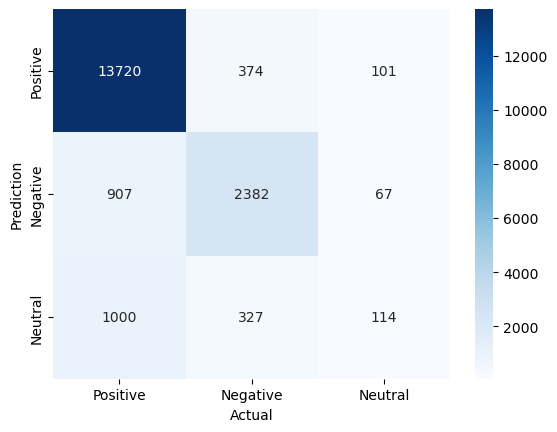

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred,labels=["Positive","Negative","Neutral"])
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["Positive","Negative","Neutral"],yticklabels=["Positive","Negative","Neutral"])
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18584\50696458.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Sentiment'],palette="pastel")


<Axes: xlabel='Sentiment', ylabel='count'>

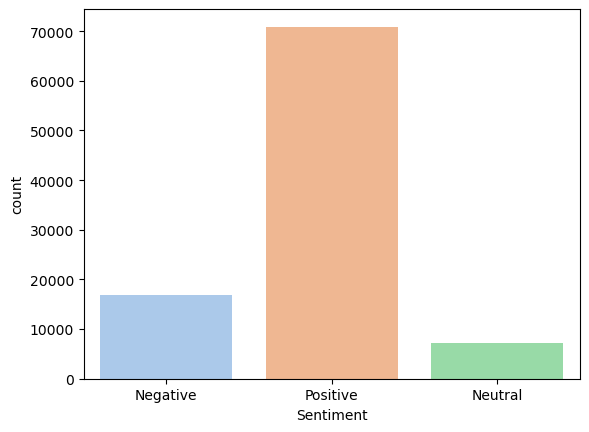

In [16]:
sns.countplot(data=df,x=df['Sentiment'],palette="pastel")

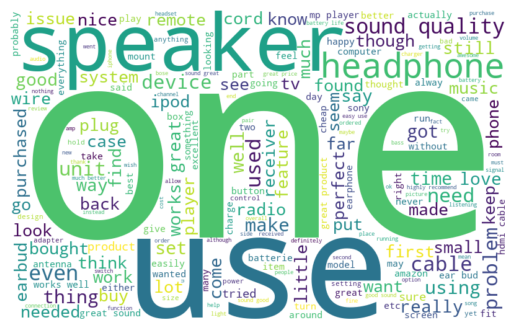

In [17]:
from wordcloud import WordCloud   #IN - GENERAL
txt=' '.join(df['new_review'])
wc=WordCloud(width=800,height=500,background_color='white').generate(txt)
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

# VADER

In [18]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#configure file name 
FN="review.csv"
RC="review_body"
def review_analysis(text,analyzer):
    s="" if pd.isna(text) else str(text)
    vs=analyzer.polarity_scores(s)
    cs=vs["compound"]
    if cs>=0.05:
        label="Positive"
        return label,cs
    elif cs<=-0.05:
        label="Negative"
        return label,cs
    else:
        label="Neutral"
        return label,cs

try:
    df1=pd.read_csv(FN)
    sid=SentimentIntensityAnalyzer()
    print("----------------1--------------------\n")
    df1[['Sentiment_Label','Sentiment_score']]=df1.apply(lambda i : review_analysis(i[RC],sid),axis=1,result_type='expand')
    print("----------------2--------------------\n")
    df1.to_csv("amazon_vader.csv")
    print("----------------3--------------------\n")
except Exception as e:
    print(e)

----------------1--------------------

----------------2--------------------

----------------3--------------------



In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

X=df1['review_body']
y=df1['Sentiment_Label']

#Training-Testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5000)

#TFIDF 
vectorizer=TfidfVectorizer(stop_words='english')
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

#Logistic Regression Model
model=LogisticRegression(max_iter=150)
model.fit(X_train_tfidf,y_train)

#Prediction
y_pred=model.predict(X_test_tfidf)

#Accuracy
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.8683753486658596


C:\Users\HP\AppData\Local\Temp\ipykernel_18584\1250427411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1,x=df1['Sentiment_Label'],palette='Greens')


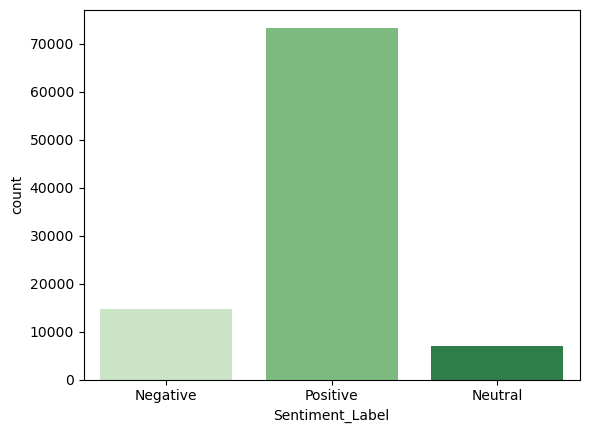

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred,labels=["Positive","Negative","Neutral"])
sns.countplot(data=df1,x=df1['Sentiment_Label'],palette='Greens')
plt.show()

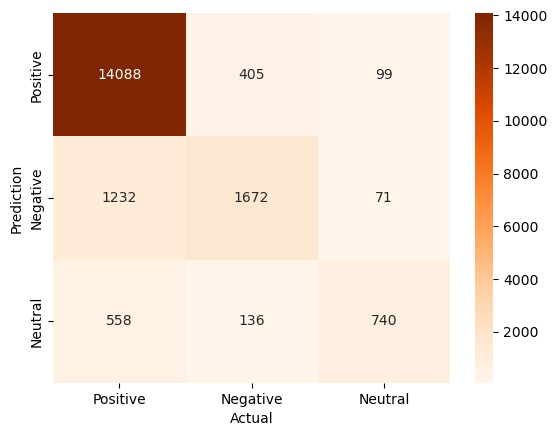

In [22]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=["Positive","Negative","Neutral"],yticklabels=["Positive","Negative","Neutral"],cmap='Oranges')
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

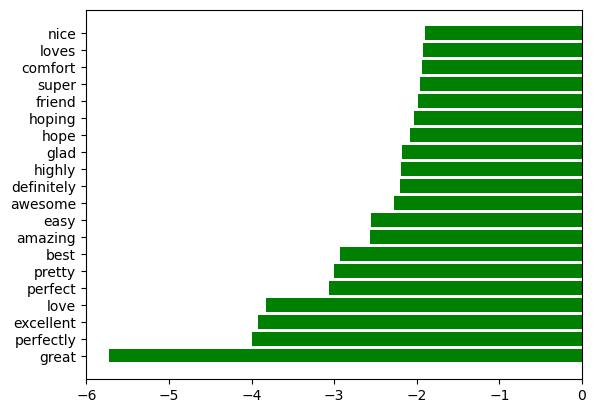

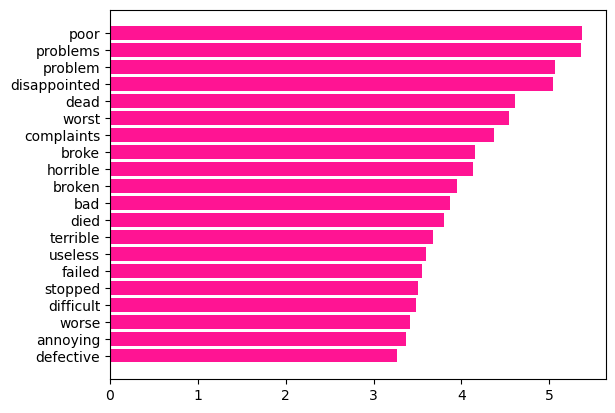

In [23]:
fn=vectorizer.get_feature_names_out()
co=model.coef_[0]
top_neg=co.argsort()[-20:] #top 20
top_pos=co.argsort()[:20]
l=[]
plt.barh([fn[i] for i in top_pos],co[top_pos],color='green')
plt.show()

plt.barh([fn[i] for i in top_neg],co[top_neg],color='deeppink')
plt.show()

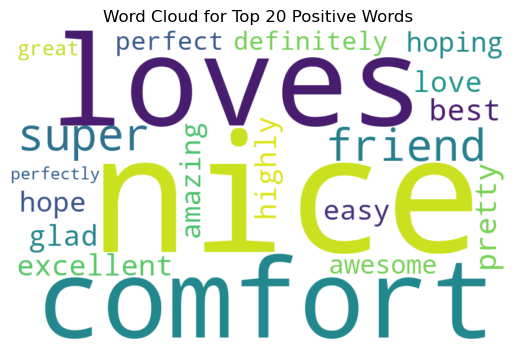

In [24]:
from wordcloud import WordCloud   #Positive
pos20={fn[i] :co [i] for i in top_pos} #works with dictionary
wc=WordCloud(width=800,height=500,background_color='white')
wc.generate_from_frequencies(pos20)
plt.title("Word Cloud for Top 20 Positive Words")
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()


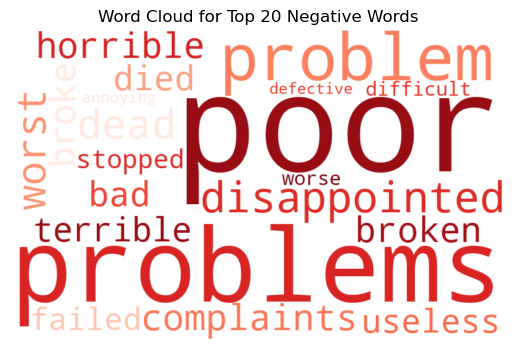

In [25]:
from wordcloud import WordCloud #Negative
neg20={fn[i]:co[i] for i in top_neg}
wc=WordCloud(width=800,height=500,background_color='white',colormap='Reds')
wc.generate_from_frequencies(neg20)
plt.title("Word Cloud for Top 20 Negative Words")
plt.imshow(wc,interpolation='bilinear')
plt.axis('Off')
plt.show()
